# Visualize data for 3 species classifiers

Monday, May 21, 2018

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ternary

In [4]:
import os
import sys

#Store the relative and absolute path to the home directory of the project
project_directory = '../..'
project_path = os.path.abspath(os.path.join(project_directory))

#Add the project path to the system path if necessesary, to be able to load modules from subdirectories
if project_path not in sys.path:
    sys.path.append(project_path)

In [5]:
import src.image_manager as im
import src.model_eval as meval

## Load the data

In [6]:
train_images_path = os.path.join(project_path, 'data', 'predictions_3species_train_20180518.csv')
test_images_path = os.path.join(project_path, 'data', 'predictions_3species_test_20180518.csv')

In [7]:
train_images = im.load_df(train_images_path)
test_images = im.load_df(test_images_path)

In [8]:
train_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_gb_acer_macrophyllum,prob_gb_picea_sitchensis,prob_gb_platanus_acerifolia
4859,b483ca6d35c26be4,image_platanus_acerifolia_70.png,platanus_acerifolia,0.178430,0.183531,0.638039,0.077894,0.073958,0.848147,0.072220,0.086408,0.841372
430,eab824d0f0275ff0,image_acer_macrophylum_48.png,acer_macrophyllum,0.385181,0.288694,0.326125,0.523094,0.261840,0.215066,0.640437,0.133107,0.226456
3723,96c6eee1342fd0e0,image_sitka_spruce_branches_72.png,picea_sitchensis,0.092127,0.881363,0.026510,0.008962,0.989278,0.001760,0.057441,0.894977,0.047583
4893,87d2ba615925e69c,image_platanus_acerifolia_in_winter_67.png,platanus_acerifolia,0.283703,0.113394,0.602903,0.254364,0.033022,0.712613,0.150908,0.093110,0.755982
5016,bf9ec061679319a8,image_platanus_acerifolia_15.png,platanus_acerifolia,0.161379,0.132803,0.705818,0.096110,0.024797,0.879093,0.093978,0.082140,0.823882


In [9]:
test_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_gb_acer_macrophyllum,prob_gb_picea_sitchensis,prob_gb_platanus_acerifolia
244,ab968dad2c68b92a,image_bigleaf_maple_forest_79.png,acer_macrophyllum,0.548546,0.209120,0.242334,0.750607,0.159810,0.089583,0.511137,0.366253,0.122610
124,fa4ec0900fca3e2f,image_acer_macrophylum_seeds_55.png,acer_macrophyllum,0.313528,0.389070,0.297402,0.352706,0.388136,0.259158,0.278786,0.360384,0.360831
3782,919754baa2265e6b,image_sitka_spruce_cones_11.png,picea_sitchensis,0.167004,0.690549,0.142447,0.177125,0.518942,0.303932,0.143112,0.740831,0.116057
4119,bec0a0ee99265f64,image_picea_sitchensis_in_winter_37.png,picea_sitchensis,0.169243,0.685277,0.145480,0.065231,0.909061,0.025708,0.094602,0.810644,0.094755
4755,cf677c013aba0743,image_platanus_acerifolia_in_winter_84.png,platanus_acerifolia,0.159598,0.383001,0.457401,0.107544,0.369944,0.522512,0.164519,0.275061,0.560420


## Manually recreate confusion matrix for gradient booster

Switch the order of the species to match original data.

In [11]:
species = ['Maple', 'Plane', 'Spruce']
gb_confusion = np.array([[69,31, 14], [7,86,10], [7,6,98]])

In [12]:
gb_confusion

array([[69, 31, 14],
       [ 7, 86, 10],
       [ 7,  6, 98]])

Confusion matrix, without normalization
[[69 31 14]
 [ 7 86 10]
 [ 7  6 98]]


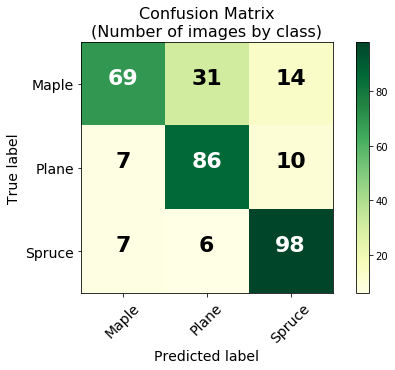

In [18]:
plt.figure(figsize=(7,5))
meval.plot_confusion_matrix(gb_confusion, species, cmap='YlGn', colorbar=True)
plt.savefig(project_path + '/data/confusion_3species.png',bbox_inches="tight")
plt.show()

## Get the true labels and probabilities out of the dataframes

In [109]:
#True labels
y_test = test_images['folder']
y_train = train_images['folder']

#L2 logistic
y_test_logl2 = test_images[['prob_logl2_acer_macrophyllum',
                            'prob_logl2_picea_sitchensis',
                            'prob_logl2_platanus_acerifolia']]
y_train_logl2 = train_images[['prob_logl2_acer_macrophyllum',
                            'prob_logl2_picea_sitchensis',
                            'prob_logl2_platanus_acerifolia']]

#L1 logistic
y_test_logl1 = test_images[['prob_logl1_acer_macrophyllum',
                            'prob_logl1_picea_sitchensis',
                            'prob_logl1_platanus_acerifolia']]
y_train_logl1 = train_images[['prob_logl1_acer_macrophyllum',
                            'prob_logl1_picea_sitchensis',
                            'prob_logl1_platanus_acerifolia']]

#Gradient booster
y_test_gb = test_images[['prob_gb_acer_macrophyllum',
                            'prob_gb_picea_sitchensis',
                            'prob_gb_platanus_acerifolia']]
y_train_gb = train_images[['prob_gb_acer_macrophyllum',
                            'prob_gb_picea_sitchensis',
                            'prob_gb_platanus_acerifolia']]

In [22]:
y_test.unique()

array(['acer_macrophyllum', 'picea_sitchensis', 'platanus_acerifolia'], dtype=object)

In [37]:
latin_names = ['acer_macrophyllum', 'picea_sitchensis', 'platanus_acerifolia']
common_names = ['Bigleaf Maple', 'Sitka Spruce', 'London Plane']

In [30]:
y_test_logl2.head()

,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia
244,0.548546,0.209120,0.242334
124,0.313528,0.389070,0.297402
3782,0.167004,0.690549,0.142447
4119,0.169243,0.685277,0.145480
4755,0.159598,0.383001,0.457401


## Recreate triangular plots - write a function to do it

In [118]:
# Based on code from Yichen Qiu
# Scatter Plot
def triangular_plot(tax, y_true, y_pred_probs, classes, axis_labels, title):
   
    #Code from https://github.com/marcharper/python-ternary/blob/master/examples/Ternary-Examples.ipynb
    fontsize = 20
    tax.set_title(title, fontsize=fontsize)
#     tax.bottom_axis_label(axis_labels[0], fontsize=fontsize, position=(1,0,0), offset=-0.04)
#     tax.left_axis_label(axis_labels[1], fontsize=fontsize, position=(0,1,0))
#     tax.right_axis_label(axis_labels[2], fontsize=fontsize, position=(0,0,1))

    tax.bottom_axis_label(axis_labels[1], fontsize=fontsize, offset=-0.04)
    tax.left_axis_label(axis_labels[0], fontsize=fontsize)
    tax.right_axis_label(axis_labels[2], fontsize=fontsize)


    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue")
    
    center_point = (1/3, 1/3, 1/3)

    points = y_pred_probs[y_true==classes[0]]
    tax.scatter(points, marker='s', color='orange', label=axis_labels[0])
    # Draw an arbitrary line, ternary will project the points for you
    axis_point = (0,0.5,0.5)
    tax.line(axis_point, center_point, linewidth=2, color='magenta')

    points = y_pred_probs[y_true==classes[1]]
    tax.scatter(points, marker='D', color='green', label=axis_labels[1])
    axis_point = (0.5,0,0.5)
    tax.line(axis_point, center_point, linewidth=2, color='magenta')

    points = y_pred_probs[y_true==classes[2]]
    tax.scatter(points, marker='H', color='blue', label=axis_labels[2])
    axis_point = (0.5,0.5,0)
    tax.line(axis_point, center_point, linewidth=2, color='magenta')

    tax.legend(fontsize=18)
    tax.ticks(axis='lbr', linewidth=1, multiple=0.1,tick_formats='%.1f')
    tax.clear_matplotlib_ticks()

    tax.show()

## Plots for Test Data

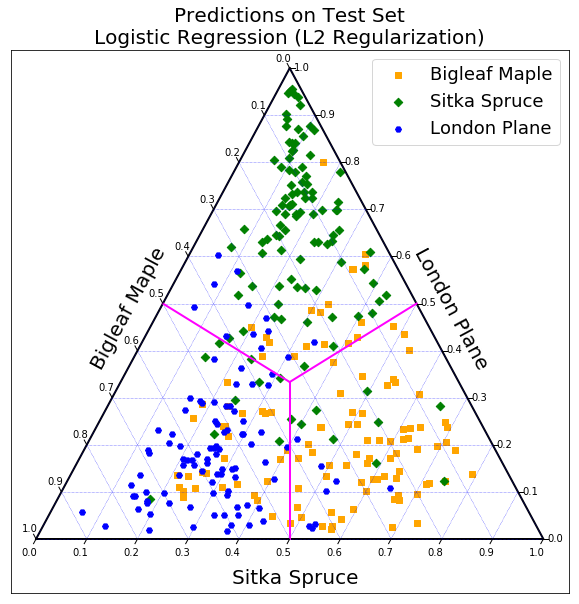

In [119]:
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

title = "Predictions on Test Set\nLogistic Regression (L2 Regularization)"
triangular_plot(tax, y_test.values, y_test_logl2.values, latin_names, common_names, title)
figure.savefig(project_path + '/data/triangle_logl2_test.png', bbox_inches="tight")

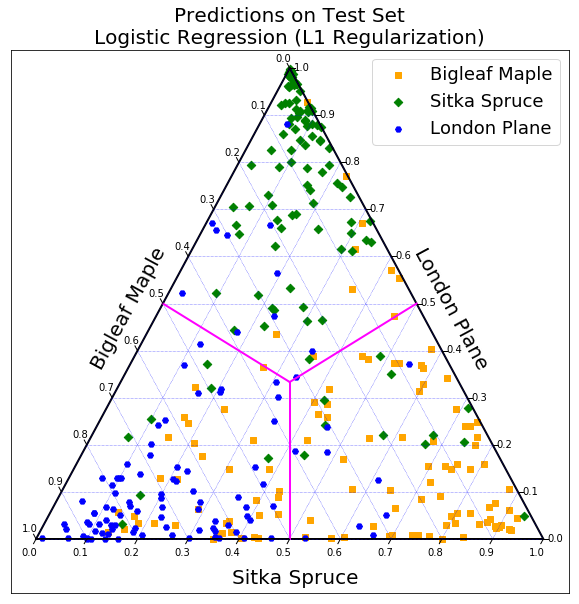

In [107]:
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

title = "Predictions on Test Set\nLogistic Regression (L1 Regularization)"
triangular_plot(tax, y_test.values, y_test_logl1.values, latin_names, common_names, title)
figure.savefig(project_path + '/data/triangle_logl1_test.png', bbox_inches="tight")

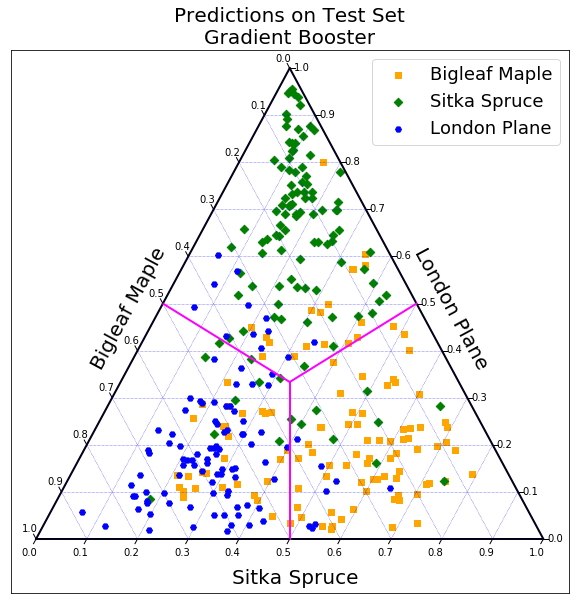

In [108]:
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

title = "Predictions on Test Set\nGradient Booster"
triangular_plot(tax, y_test.values, y_test_logl2.values, latin_names, common_names, title)
figure.savefig(project_path + '/data/triangle_gb_test.png', bbox_inches="tight")

## Plots for Training Data

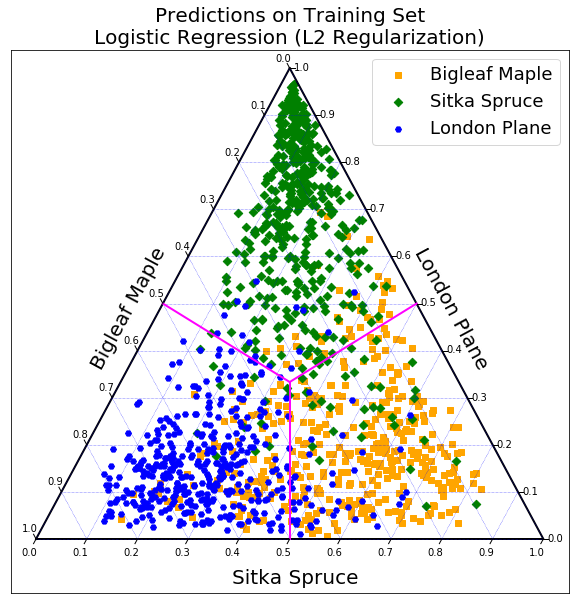

In [110]:
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

title = "Predictions on Training Set\nLogistic Regression (L2 Regularization)"
triangular_plot(tax, y_train.values, y_train_logl2.values, latin_names, common_names, title)
figure.savefig(project_path + '/data/triangle_logl2_train.png', bbox_inches="tight")

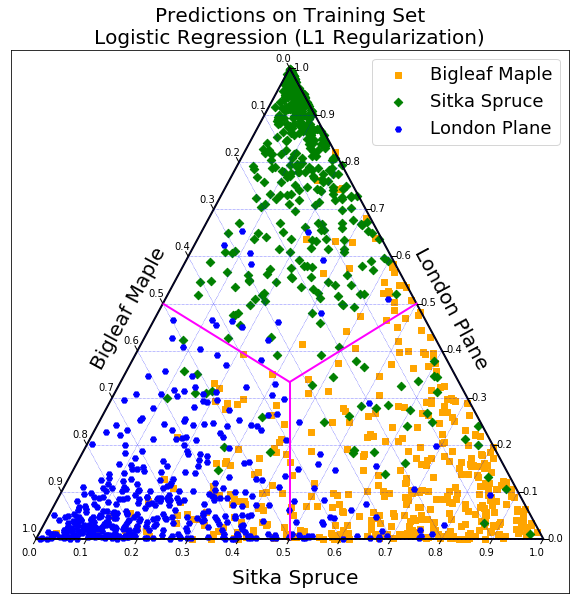

In [112]:
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

title = "Predictions on Training Set\nLogistic Regression (L1 Regularization)"
triangular_plot(tax, y_train.values, y_train_logl1.values, latin_names, common_names, title)
figure.savefig(project_path + '/data/triangle_logl1_train.png', bbox_inches="tight")

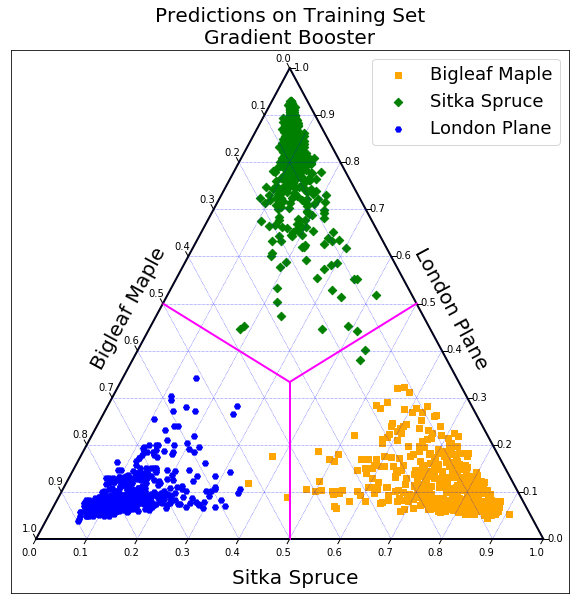

In [113]:
scale = 1
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)

title = "Predictions on Training Set\nGradient Booster"
triangular_plot(tax, y_train.values, y_train_gb.values, latin_names, common_names, title)
figure.savefig(project_path + '/data/triangle_gb_train.png', bbox_inches="tight")

## Create an ImageManager to get an image of the image dataframe

In [121]:
photo_directory = os.path.join(project_path, 'tree_photos/')
image_df_path = os.path.join(project_path, 'data', 'image_log.csv')
syncs_df_path = os.path.join(project_path, 'data', 'image_syncs.csv')

manager = im.ImageManager(photo_directory, image_df_path, syncs_df_path)

In [122]:
manager.image_df.tail(10)

,p_hash,filename,folder,time_added,time_verified
5710,fcf85534a393a02d,image_alnus_rubra_405.png,alnus_rubra,2018-05-11 18:14:09.968478,2018-05-18 19:20:42.114770
5711,8fc70104ce9fce2e,image_alnus_rubra_439.png,alnus_rubra,2018-05-11 18:14:09.976103,2018-05-18 19:20:42.151296
5712,c9b5e29a74659c58,image_alnus_rubra_175.png,alnus_rubra,2018-05-11 18:14:09.984393,2018-05-18 19:20:42.188619
5713,9b10253f21b46eeb,image_alnus_rubra_613.png,alnus_rubra,2018-05-11 18:14:09.992992,2018-05-18 19:20:42.227030
5714,d92a351e8f875271,image_alnus_rubra_607.png,alnus_rubra,2018-05-11 18:14:10.001187,2018-05-18 19:20:42.277629
5715,e3d1a51ade1ed221,image_alnus_rubra_161.png,bad_images,2018-05-11 18:14:10.009734,2018-05-18 19:20:43.238080
5716,ad2d947b5a659648,image_alnus_rubra_565.png,alnus_rubra,2018-05-11 18:14:10.018080,2018-05-18 19:20:42.323516
5717,8b05fe78a0493f4d,image_alnus_rubra_203.png,alnus_rubra,2018-05-11 18:14:10.026810,2018-05-18 19:20:42.373039
5718,97119696354fc11f,image_alnus_rubra_571.png,alnus_rubra,2018-05-11 18:14:10.033848,2018-05-18 19:20:42.413830
5719,bc1723651b3d3998,image_alnus_rubra_559.png,alnus_rubra,2018-05-11 18:14:10.040280,2018-05-18 19:20:42.449314


In [123]:
[k/7 for k in range(7)]

[0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571]